<a href="https://colab.research.google.com/github/HoschangNoori/my-first-blog/blob/master/Exercise_01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from numpy import convolve
import matplotlib.pyplot as plt
import pandas as pd
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

"""
1. I strongly recommend installation using conda as it will bring in all of the executable dependencies that cartopy requires. 
With conda installed, installing the latest version of cartopy would look like:

>>conda install --channel conda-forge cartopy

2. Python 3.6 is recommended for cartopy. A higher version could lead to errors.
"""

'\n1. I strongly recommend installation using conda as it will bring in all of the executable dependencies that cartopy requires. \nWith conda installed, installing the latest version of cartopy would look like:\n\n>>conda install --channel conda-forge cartopy\n\n2. Python 3.6 is recommended for cartopy. A higher version could lead to errors.\n'

# Temporal and Spatial DataMining

The following task covers the basics for creating browser-based scripts (Notebooks) based on Python code. Using Python is effectively for interactive scientific and data-intensive computing. This Notebook will start by stepping through some of the Python features that are useful to the practice of data science, focusing especially on the syntax it offers beyond the standard features of Python

## Exercise 01

### Vectors and matrices

To create vectors with 2 dimensions in numpy we use np.arrays. For example, to create vectors a and b:

x$=\begin{pmatrix}-2.0 \\ 4.0\end{pmatrix}$ 

y$=\begin{pmatrix}5.0 \\ 1.0\end{pmatrix}$

- create the vectors **x** and **y**

In [2]:
x= np.array([-2, 4])
y= np.array([5, 1])

The contents of these arrays can be displayed using the *print()* command:

- print the vectors using *print()*

In [3]:
print(x)
print(y)

[-2  4]
[5 1]


A certain value can be accessed via the **index** within the square brackets. Note that the first entry with the index 0 is selected.

- print the first entry of the vector **x** and the last entry of the vector **y**

In [4]:
print(x[0])
print(y[1])

-2
1


- Perform the following operations with vectors **x** and **y**:

    - $\mathbf{x} \cdot \mathbf{y}$ (dot or scalar product)

    - $\mathbf{x} \otimes \mathbf{y}$ (outer product)

    - $\mathbf{x} \odot \mathbf{y}$ (elementwise multiplication $c_i = a_i \cdot b_i$) 

**Reference:** [linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)

In [5]:
print(np.dot(x, y))
print(np.outer(x, y))
print(x*y)

-6
[[-10  -2]
 [ 20   4]]
[-10   4]


The second important structure in linear algebra are for sure *matrices*. These can be created using numpy arrays as well, by nesting *lists* (a list is defined by using brackets '[' and ']'):

- Create 2x2 matrices by nesting *lists*

In [6]:
np.array([[1, 0], [0, 1]])

array([[1, 0],
       [0, 1]])

Additionally numpy provides its own type for matrices called **matrix**. You can either convert your existing arrays to a matrix or create new ones from lists:

**Reference:** [matrix](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html)

In [7]:
# Convert
v = np.asmatrix(x).T

# Create new object
u = np.asmatrix(y).T

# Define new matrix (nesting lists)
A = np.asmatrix([[1.0, -0.5], [-0.5, 1.0]])
# Define new Matrix using existing arrays
B = np.matrix([x, y])

print("Vector x as np.array: ", x, "Dimension: ", x.shape)
print("Vector v as np.matrix: ", v, "Dimension: ", v.shape)
print("v:vector transposed: \n", v.T, '\n')

print('Matrix A = \n', A, '\n')
print('Matrix B = \n', B, '\n')

Vector x as np.array:  [-2  4] Dimension:  (2,)
Vector v as np.matrix:  [[-2]
 [ 4]] Dimension:  (2, 1)
v:vector transposed: 
 [[-2  4]] 

Matrix A = 
 [[ 1.  -0.5]
 [-0.5  1. ]] 

Matrix B = 
 [[-2  4]
 [ 5  1]] 



Numpy makes it simple to perform common matrix operations

- perform the following operations: 
    - $\mathbf{A}= (\mathbf{v}-\mathbf{u})^\text{T}\cdot\mathbf{M}\cdot(\mathbf{v}-\mathbf{u})$

In [8]:
# use the following Matrix M
M = np.matrix([[1,2], [3,4]])

A = (v-u).T@M@(v-u)
print(A)

[[-20]]


### Functions:

Now implement the previously defined equations as callable functions. A function is defined using the **def** keyword followed by the name of the function and a list of formal parameters:

- create a function "add", which adds two parameters and returns their sum

In [9]:
def add(x, y):
  return x + y

To use the function, it is called with the desired parameters:

- Try to call the function with the following input parameters
    - add("hello", " World")
    - add(100, 20)
    - add(x, y)
    - add("one", 2)

In [10]:
add(100, 20)
add(x, y)


array([3, 5])

Anonymous functions can also be created using *lambda*:

In [11]:
# also adds two parameters and returns the sum

add2 = lambda a, b : a+b
add2(3, 4)

7

The euclidean distance of two vectors **u**, **v** is given by: $\sqrt{\sum_d^{D} (u_d - v_d)^2}$

**Note:** To calculate the square root use **np.sqrt** on arrays you can rely on pythons syntactic sugar (**x\*\*n** =$y^n$) for exponentiation.

Implement the function *euc_loop* using numpy arrays (e.g. **x** and **y**) using a [for loop](https://docs.python.org/3/tutorial/controlflow.html)

In [12]:
add2 = lambda a, b : a+b
add2(3, 4)

7

Implement the function *euc_sum* using numpy arrays (e.g. **a** and **b**) and **np.sum**. 

__Note__: You should not use any loops in your solution.

In [13]:
def euc_loop(x, y):
  quadratic_differences= 0
  for i, j in zip(x, y):
    quadratic_differences+=(i-j)**2
  return np.sqrt(quadratic_differences)
euc_loop(x, y)

7.615773105863909

Implement the function *euc* using numpy _matrices_ (e.g. __u__ and __v__)

__Note__: Recall the definition of the Euclidean distance using the dot product.

In [14]:
def euc_sum(a, b):
  return np.sqrt(np.sum((a-b)**2))
euc_sum(x, y)

7.615773105863909

The euclidean distance is a special form of the <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm">p-norm</a>:

$pnorm(\mathbf{u},\mathbf{v},p) = (\sum_d^D |u_d - v_d|^p)^{\frac{1}{p}}$

Implement a function **pnorm** with takes as argument two vectors **a**, **b** and a parameter **p**:

In [15]:
def pnorm(a, b, p):
  squared_differences= 0
  for i in range(p):
    squared_differences += np.abs(a[i]-b[i])**p
  return squared_differences**(1/p)

pnorm(x, y, 2)


7.615773105863909

The [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) of two vectors __u__, __v__ and a covariance matrix __S__ is given by:

$\sqrt{(\mathbf{u}-\mathbf{v})^TS^{-1}(\mathbf{u}-\mathbf{v})}$

with the vektors: **u**$=\begin{pmatrix}u_{1} \\ u_{2} \\ ... \\ u_{n-1} \\ u_{n} \end{pmatrix}$ and 
**v**$= \begin{pmatrix} v_{1} \\ v_{2} \\ ... \\ v_{n-1} \\ v_{n} \end{pmatrix}$

A covariance matrix is a symmetric, positive semidefinite matrix. Use the provided matrix S:

$S=\begin{pmatrix}1.2 & -0.7 \\ -0.7 & 1.2 \end{pmatrix}$

In [16]:
S = np.matrix([[1.2, -.7], [-.7, 1.2]])

Implement a function **mahalanobis** which takes as argument two vectors __a__, __b__ and a matrix **S**:

__Note:__ __a__ and __b__ are two numpy arrays. 

In [17]:
def mahalanobis(a, b, S):
  d= a-b
  S_inv= np.linalg.inv(S)
  return np.sqrt(d.T@S_inv@d)

mahalanobis(x,y,S)

matrix([[6.50505876]])

What happens if the covariance matrix **S** is equal to the identity matrix **I**?
Confirm your hypothesis by using numpys **np.eye**.

**Answer:** When S == I (I=identity Matrix) mahalanobis distance equal euclidean distance

In [18]:
I = np.eye(2)
mahalanobis(x, y, I)

7.615773105863909

### Further tasks

Work out the basic functions of the library *numpy* with the help of a freely chosen tutorial (e.g. http://www.python-kurs.eu/numpy.php).

Many other commands are also available e.g. on
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html.

## Exercise 02

### PLOT DATA

This exercise is about getting to know different plot mechanisms. You will be provided with 2 different data sets. Data set 1 serves to represent temporal data and data set 2 serves to represent spatial data. The additional task deals with the moving average and uses the same data set as in task 1.

## Task 1: Plot temporal data

The task is to graphically display the given data.

To do this, follow these steps:

1) Read in the time series

2) Display the time series as a Line Plot

3) Use the timestamp of the time series as x-axis label

4) What is a meaningful label for the y-axis?

5) Enlarge the area of the graph

Text(0, 0.5, 'Relative Power Generation')

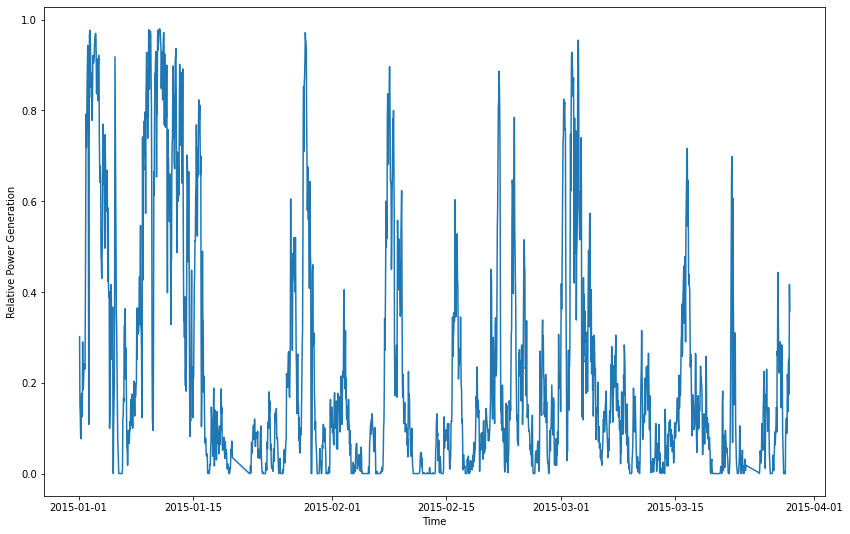

In [19]:
# read time series
# replace path with own path
data_df = pd.read_csv('/content/drive/MyDrive/Ex 1/data/relative_power_generation.csv', index_col=0)
data_df.index = pd.to_datetime(data_df.index)

plt.figure(figsize=(14,9))
plt.plot(data_df.index, data_df.generation)
plt.xlabel('Time')
plt.ylabel('Relative Power Generation')


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 2: Plot spatial data

The next task deals with the representation of data on maps.

The following steps have to be solved:

1) Read in the spatial data

2) Display the points on the map with different sizes depending on their values.

In [21]:
# read the data
# Columns in data:  NaN, size, lat, lon
spatial_data = np.genfromtxt('/content/drive/MyDrive/Ex 1/data/german_cities_with_population.csv', delimiter=',')

# values of individual columns

### Your Code Here ###

In [ ]:
mrc = ccrs.Mercator()

# just to zoom in to only Germany
lons = np.array([5.87, 15.04])
lats = np.array([47.26, 55.06])

fig = plt.figure(figsize=(30,15))  # predefined figure size, change to your liking. 
# But doesn't matter if you save to any vector graphics format though (e.g. pdf)

# Downloaded from http://biogeo.ucdavis.edu/data/gadm2/shp/DEU_adm.zip
fname = '/content/drive/MyDrive/Ex 1/data/DEU_adm1'
adm1_shapes = list(shpreader.Reader(fname).geometries())


ax = plt.axes(projection = mrc)
ax.coastlines(resolution='10m')
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='white', alpha=0.5)

ax.set_extent(np.hstack([lons, lats]), ccrs.PlateCarree()) 

### Your Code Here ###

plt.show()

Geometry must be a Point or LineString


## Additional task: moving average

Find out briefly what a Moving Average is. You've already explored loops and indexing in the previous exercise. Think about how to write an algorithm that outputs the moving average for a given time series.

1) What is a moving average

2) Write a function or an algorithm that implements the moving average

3) Display the original time series and time series using a moving average filter.

4) Is it possible to use other properties besides the mean?

In [ ]:
a=np.genfromtxt('data/relative_power_generation.csv', delimiter=',')
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
y=a[1:,1]
x=np.linspace(0,len(y),2000)

